### Student ID: 18195067
### Student Name: Abhijit Sinha

In [1]:
# Importing Modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
# Importing Dataset and using the first column as the index
df = pd.read_csv("./bank_et2.csv", index_col=['Unnamed: 0'])

In [3]:
df.head(5)

,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,1.300134,0.473895,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,-0.193701,0.237021,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,1.334266,0.121981,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,0.362286,1.251328,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,0.072075,-0.533738,yes,no,cellular,1,apr,479,1,307,1,failure,no


In [4]:
df.tail(5)

,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,-2.170524,1.081071,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,0.811788,1.134496,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,0.504655,0.042190,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,-0.965874,0.302708,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,-0.800893,1.066659,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


In [5]:
df.describe()

,age,balance,ratio_bal_ln,ratio_ln_inc,day,duration,campaign,pdays,previous
count,1988.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.753018,1413.663500,0.241951,0.485030,13.851500,292.020500,1.909500,167.896000,2.561500
std,12.724358,3131.224213,0.821604,1.075543,9.712189,221.557295,1.378862,131.754126,3.400735
min,18.000000,-980.000000,-2.632068,-2.851405,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,201.500000,-0.308018,-0.274181,5.000000,146.000000,1.000000,75.750000,1.000000
50%,38.000000,551.000000,0.224099,0.487082,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1644.500000,0.806315,1.211896,23.000000,379.000000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,2.961979,4.046914,31.000000,1823.000000,11.000000,854.000000,55.000000


In [6]:
# Check the summary of categorical attributes
df.describe(include=np.object)

,job,marital,education,default,housing,loan,contact,month,poutcome,subscribed
count,1990,2000,1896,2000,2000,2000,1809,2000,1546,2000
unique,11,3,3,2,2,2,2,12,3,2
top,management,married,secondary,no,no,no,cellular,feb,failure,yes
freq,461,1111,995,1985,1037,1750,1663,404,955,1000


## Task 1 (CS5062)
Fill-in the missing values in the bank dataset. Use the EDA techniques from E-tivity 1 to decide how to fill in missing values. In your notebook, explain shortly (max 250 words) the decisions you have taken.

In [7]:
# Check for null values
df.isnull().sum() #.sort_values(ascending=False)

age              12
job              10
marital           0
education       104
default           0
balance           0
ratio_bal_ln      0
ratio_ln_inc      0
housing           0
loan              0
contact         191
day               0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome        454
subscribed        0
dtype: int64

#### There is missing data in the following features:
    - age      : 12 missing
    - job      : 10 missing
    - education: 104 missing
    - contact  : 191 missing
    - poutcome : 454 missing

#### Correlation of numerical attributes

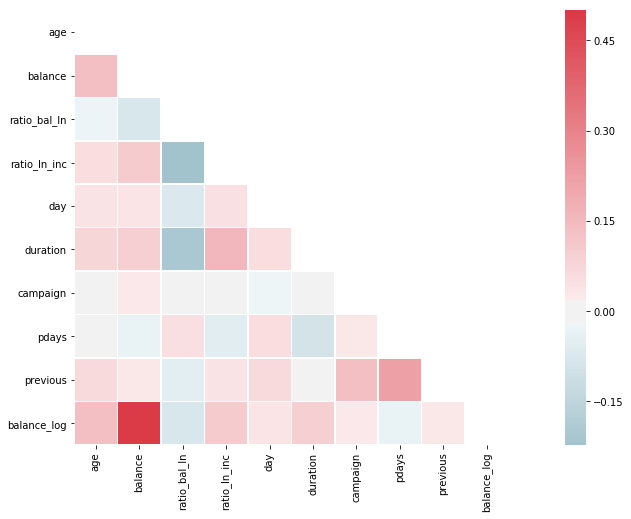

In [37]:
f, ax = plt.subplots(figsize=(20, 8))

# Compute the correlation matrix
#(https://seaborn.pydata.org/examples/many_pairwise_correlations.html)
corr = df.corr()

# Generate a mask for the upper triangle
mask=np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.5, center=0, square=True, linewidths=.5)

#### Handling missing values for AGE

In [9]:
df['age'].describe()

count    1988.000000
mean       41.753018
std        12.724358
min        18.000000
25%        32.000000
50%        38.000000
75%        50.000000
max        93.000000
Name: age, dtype: float64

In [10]:
# Lets analyse the dataframe with missing age values
df[df['age'].isnull()]

,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
456,NaN,self-employed,married,tertiary,no,917,0.311161,-0.818688,no,no,cellular,6,feb,518,3,212,5,failure,no
472,NaN,blue-collar,married,primary,no,474,0.729179,0.350980,yes,yes,telephone,9,feb,152,3,221,1,failure,no
526,NaN,services,married,secondary,no,2478,0.469463,0.180632,yes,no,cellular,28,jan,347,1,230,1,failure,no
595,NaN,management,married,tertiary,no,1857,-0.137751,0.524516,no,no,cellular,29,jan,386,1,168,4,failure,no
597,NaN,self-employed,married,secondary,yes,254,0.800582,0.370658,yes,yes,cellular,29,jan,194,1,188,1,failure,no
601,NaN,admin.,single,secondary,no,111,0.269082,0.060002,yes,no,cellular,29,jan,55,1,195,3,failure,no
605,NaN,management,married,tertiary,no,1330,1.007376,-0.459770,yes,no,cellular,29,jan,41,2,261,1,failure,no
744,NaN,management,married,tertiary,no,-61,0.638129,-1.001420,no,no,cellular,30,jan,90,5,172,1,failure,no
795,NaN,technician,single,tertiary,no,992,0.901646,-0.098458,yes,no,cellular,4,may,301,1,88,2,success,no
1171,NaN,retired,married,tertiary,no,2812,-0.336489,2.210606,no,no,cellular,3,aug,392,4,181,3,success,yes


- We can see that the customers who's age is missing are either `married or single` and none of the divorced customers age is missing.

##### Attribute "age" can be related to the attributes "job" and "marital" status. 

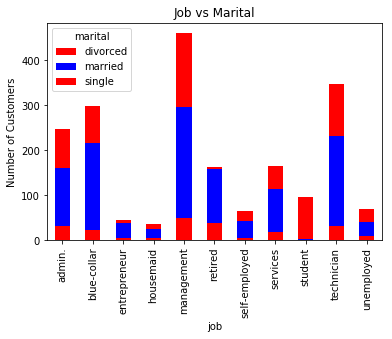

marital,divorced,married,single,All
job,,,,
admin.,32,128,87,247
blue-collar,22,193,83,298
entrepreneur,4,33,8,45
housemaid,5,20,10,35
management,49,247,165,461
retired,38,120,4,162
self-employed,5,37,22,64
services,19,95,51,165
student,1,1,94,96


In [11]:
# Job vs Marital
stacked_chart = pd.crosstab(df['job'], df['marital'])
stacked_chart.plot(kind='bar', stacked=True, color=['red', 'blue'])
plt.title("Job vs Marital")
plt.ylabel('Number of Customers')
plt.show()

# Since there are a lot of categories in "job" lets see the values
pd.crosstab(df.job, df.marital,margins=True).style.background_gradient(cmap='summer_r')

We can see that there are enough samples in the data set which correlates the missing age w.r.t job and marital status. SO we can go ahead and use the mean age from the correlated attributes.

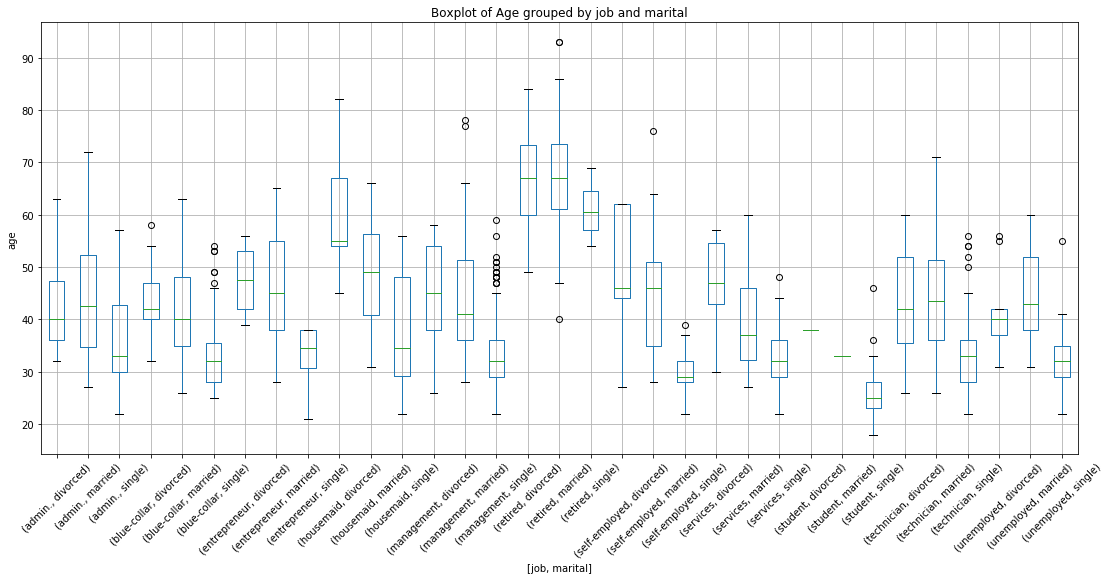

In [12]:
df.boxplot(column='age', by=['job', 'marital'], rot=45, figsize=(18,8))

plt.title("Boxplot of Age grouped by job and marital")
plt.ylabel("age")
# get rid of the automatic 'Boxplot grouped by group_by_column_name' title
plt.suptitle("")
plt.show()

We can see some variation in the median of `age` for each group and these medians can be used for imputing the missing values in each group after ensuring there is no missing values for `job` and `marital` attributes.

We know that there is no missing values for marital status but attribute "job" has some missing values which needs to be handled

In [13]:
df.job.value_counts()

management       461
technician       348
blue-collar      298
admin.           247
services         165
retired          162
student           96
unemployed        69
self-employed     64
entrepreneur      45
housemaid         35
Name: job, dtype: int64

In [14]:
# Lets analyse the dataframe with missing JOB values
df[df['job'].isnull()]

,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
255,42.0,NaN,single,primary,no,2398,-1.418888,1.809977,yes,no,cellular,3,feb,144,2,271,2,failure,no
257,46.0,NaN,married,NaN,no,677,-0.399374,0.150261,no,no,cellular,3,feb,425,1,82,1,failure,no
831,41.0,NaN,single,primary,no,2398,-0.243804,-0.685437,yes,no,NaN,8,may,287,2,-1,0,NaN,no
1223,55.0,NaN,married,secondary,no,2206,-1.134511,0.861389,no,no,cellular,12,aug,265,1,91,5,success,yes
1281,50.0,NaN,married,NaN,no,558,-0.455001,1.595412,no,no,cellular,9,jul,464,1,683,6,failure,yes
1669,54.0,NaN,married,secondary,no,2206,-0.575645,-0.242814,no,no,cellular,13,may,260,1,91,4,success,yes
1711,77.0,NaN,married,NaN,no,397,-0.871514,0.134782,no,no,telephone,7,may,300,3,-1,0,NaN,yes
1801,28.0,NaN,single,NaN,no,326,0.298961,1.653248,no,no,cellular,11,oct,450,1,231,1,success,yes
1868,48.0,NaN,single,NaN,no,1819,0.680564,-0.786048,no,no,cellular,2,sep,1440,1,458,1,failure,yes
1975,45.0,NaN,married,tertiary,no,406,-2.211965,2.109631,no,no,cellular,7,sep,314,1,-1,0,NaN,yes


In [15]:
#### Handling missing value for attribute JOB

# Fill missing job values with forward fill
# Only 10 missing values can be forward filled!!!
df['job'].fillna(method='ffill', inplace=True)

# Verify if null values in Job are gone
print(df['job'].isnull().sum())

0


In [16]:
# create a pivot table, which contains the median values for all four groups.
table_age = df.pivot_table(values='age', 
                       index='marital', 
                       columns='job', 
                       aggfunc=np.median)
print(table_age)

job       admin.  blue-collar  entrepreneur  housemaid  management  retired  \
marital                                                                       
divorced    40.0         42.0          47.5       55.0        45.0     67.0   
married     43.0         40.0          45.0       49.0        41.0     67.0   
single      33.0         32.0          34.5       38.0        32.0     60.5   

job       self-employed  services  student  technician  unemployed  
marital                                                             
divorced           46.0      47.0     38.0        42.0        40.0  
married            46.0      37.0     33.0        44.0        43.0  
single             29.0      32.0     25.0        33.0        32.0  


In [17]:
# Define function to return an element of the pivot table
def get_element(x):
    return table_age.loc[x['marital'], x['job']]

# Replace missing values
df['age'].fillna(df[df['age'].isnull()].apply(get_element, axis=1), inplace=True)

In [18]:
# Verify if null values in age are gone
df['age'].isnull().sum()

0

#### Handling missing values for Education

In [19]:
# Find missing values for attribute Education
df['education'].isnull().sum()

104

In [20]:
# education properties
df['education'].value_counts()

secondary    995
tertiary     684
primary      217
Name: education, dtype: int64

In [21]:
# Lets analyse the dataframe with missing Education categories
df[df['education'].isnull()]

,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
10,38.0,management,single,NaN,no,715,1.079459,-1.642914,yes,no,cellular,2,apr,951,1,132,3,failure,no
15,38.0,blue-collar,married,NaN,no,0,0.606796,0.583824,yes,no,cellular,2,apr,477,2,267,1,failure,no
124,39.0,blue-collar,married,NaN,no,0,0.193043,-0.140199,no,no,cellular,2,feb,731,1,193,3,failure,no
209,37.0,management,married,NaN,no,247,-0.636695,-0.828058,no,no,cellular,2,feb,192,2,208,1,failure,no
257,46.0,blue-collar,married,NaN,no,677,-0.399374,0.150261,no,no,cellular,3,feb,425,1,82,1,failure,no
262,31.0,blue-collar,married,NaN,no,-120,0.865080,0.071962,yes,no,cellular,3,feb,100,3,201,2,failure,no
285,51.0,technician,divorced,NaN,no,1328,0.078528,-1.931680,yes,no,cellular,4,feb,119,1,251,1,failure,no
324,41.0,blue-collar,married,NaN,no,402,-0.358492,0.388384,yes,no,cellular,4,feb,604,1,204,2,failure,no
348,56.0,admin.,married,NaN,no,1848,1.265816,-0.039394,yes,no,cellular,4,feb,147,2,260,1,failure,no
381,43.0,management,married,NaN,no,587,1.053251,0.993957,yes,no,cellular,5,feb,11,6,231,9,failure,no


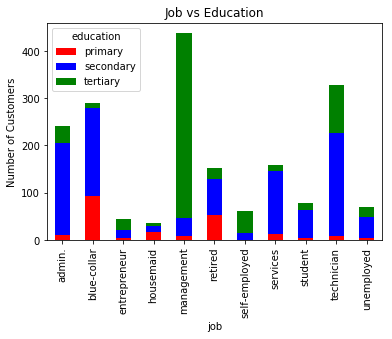

education,primary,secondary,tertiary,All
job,,,,
admin.,11,194,36,241
blue-collar,93,186,10,289
entrepreneur,4,18,22,44
housemaid,17,12,7,36
management,9,38,391,438
retired,53,77,22,152
self-employed,0,15,47,62
services,12,135,11,158
student,4,59,16,79


In [22]:
# Job vs Education
stacked_chart = pd.crosstab(df['job'], df['education'])
stacked_chart.plot(kind='bar', stacked=True, color=['red', 'blue', 'green'])
plt.title("Job vs Education")
plt.ylabel('Number of Customers')
plt.show()

# Since there are a lot of categories in "education" lets see the values
pd.crosstab(df.job, df.education, margins=True).style.background_gradient(cmap='summer_r')

In [23]:
# Impute missing values as unknown
df.loc[df['education'].isnull(), 'education'] = "unknown"

In [24]:
df.education.head(16)

0      tertiary
1     secondary
2     secondary
3     secondary
4     secondary
5      tertiary
6     secondary
7     secondary
8      tertiary
9      tertiary
10      unknown
11    secondary
12    secondary
13    secondary
14    secondary
15      unknown
Name: education, dtype: object

#### Handling missing values for Contact

In [25]:
# Find missing values for attribute contact
df['contact'].isnull().sum()

191

In [26]:
# contact category values
df['contact'].value_counts()

cellular     1663
telephone     146
Name: contact, dtype: int64

Since ~92% of the values are “cellular”, it is safe to impute the missing values as “cellular” as there is a high probability of guessing correctly. We might be adding bias to the dataset with this approach though!

In [27]:
# Fill missing Contact values with "cellular"
df['contact'].fillna('cellular', inplace=True)

#### Handling missing values for poutcome 

In [28]:
# Find missing values for attribute poutcome
df['poutcome'].isnull().sum()

454

In [29]:
# Impute missing values as unknown
df.loc[df['poutcome'].isnull(), 'poutcome'] = "unknown"

## Task 2 (CS5062)
Decide on the treatment of outliers in the bank data set. If appropriate, remove examples with extreme or unexpected attribute values, apply log transformation to numeric attributes with extreme values. Use other methods, if appropriate, to treat outliers as well. In your notebook, explain shortly (max 250 words) the decisions you have taken.

#### Outlier analysis for AGE

Text(0.5,1,'Box plot of Age attribute')

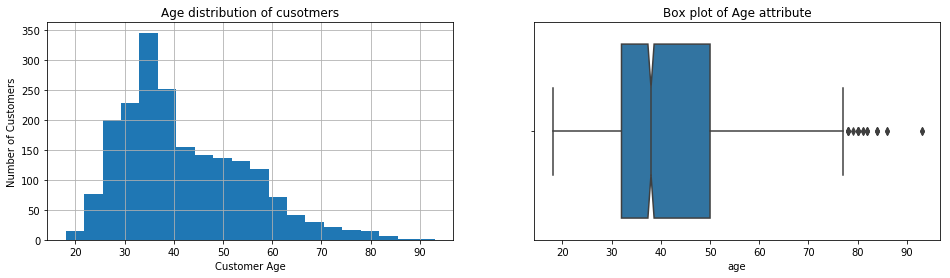

In [30]:
# Create figure with two subplots for AGE attribute
fig = plt.figure(figsize=(16,4))

# Plot AGE distribution
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Age distribution of cusotmers")
ax1.set_xlabel('Customer Age')
ax1.set_ylabel('Number of Customers')
df['age'].hist(bins=20)

# Next, we look at boxplots to examine for outliers
ax2 = fig.add_subplot(1, 2, 2)
sns.boxplot(x='age', data=df, notch=True)
ax2.set_title("Box plot of Age attribute")

Histogram on the attribute `age` shows that the data is skewed and does have a normal distribution.
The above box plot shows the possibility of some extreme values as some customers have age in range 77-95 years. However, these values seems to be in the valid range so we would like to keep them.

The log transformation, a widely used method to address skewed data which solves the problem of non-normal distribution of data. We will be using the log transformation to make data conform to normality.

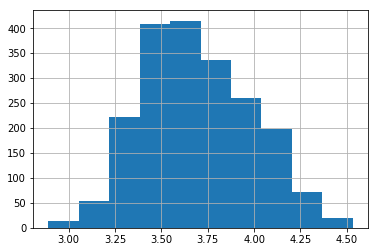

In [31]:
# Use a log transformation to decrease the impact of extreme values in column AGE
df['age'].apply(np.log).hist()
plt.show()

#### Outliers in Balance

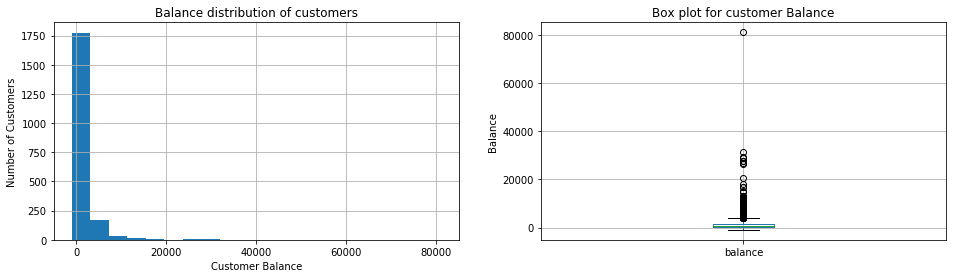

In [32]:
# Create figure with two subplots for BALANCE attribute
fig = plt.figure(figsize=(16,4))

# Plot Balance distribution
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Balance distribution of customers")
ax1.set_xlabel('Customer Balance')
ax1.set_ylabel('Number of Customers')
df['balance'].hist(bins=20)

# Next, we look at boxplots to examine for outliers
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_ylabel('Balance')
ax2.set_title("Box plot for customer Balance")
df.boxplot(column='balance')


Histogram on the attribute `balance` shows that the **data is heavily skewed** and does have a normal distribution.
The above box plot shows there are some extreme values with **one customer has a balance of above 80,000**. However, these values seems to be in the valid range from bank data so we would like to keep them.

The log transformation, a widely used method to address skewed data which solves the problem of non-normal distribution of data. We will be using the log transformation to make data conform to normality. The log transformation can be useful here as we have a large number of outliers.

In [33]:
df.balance.min()

-980

In [34]:
# Using a log transformation to decrease the impact of extreme values in column Balance

# Shift the value to 0 before applying log transformation
df["balance_log"] = df["balance"] + df.balance.min()

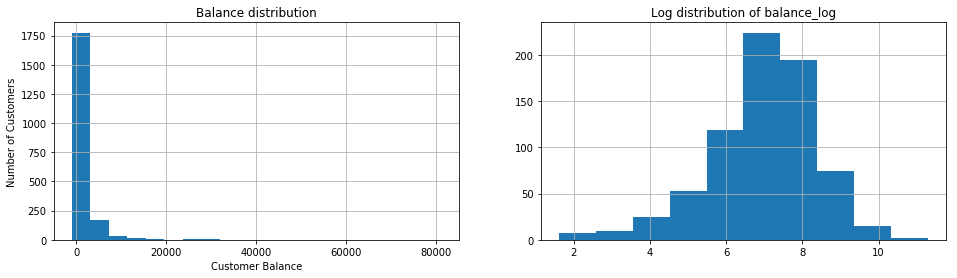

In [35]:
# Create figure with two subplots for BALANCE attribute
fig = plt.figure(figsize=(16,4))

# Plot BALANCE distribution
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Balance distribution")
ax1.set_xlabel('Customer Balance')
ax1.set_ylabel('Number of Customers')
df['balance'].hist(bins=20)

# Distrubtion of balance after appyling Log transform
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title("Log distribution of balance_log")
df['balance_log'].apply(np.log).hist()


The histograms show that both new feature `balance_log` have distribution closer to normal than the original feature `balance`

### TODO: look for other outliers in numeric data and apply other techniques

## Task 3 (CS5062)
Suggest the creation of at least one new feature from the existing ones and justify the usefulness of your choice within the context of the 2-class classification problem you have defined in E-tivity 1.